In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Boxplot
+ *<u>biểu diễn và so sánh phân bố</u>*  của các dữ liệu Categorical data
+ 1 chiều sẽ là biến Categoriacal, biến này có thể là kiểu nhãn hoặc giá trị số rời rạc
+ Nếu chỉ toàn là Boxplot thì ko cần Legend bởi vì chiều chứa dữ liệu Categorical trong boxplot là để xác định plot đó thuộc nhãn nào rồi
+ Boxplot có thể biểu diễn tối đa 3 chiều dữ liệu. Trong đó có 2 Categorical data và 1 chiều số. 
+ whiskers là 2 cái que lòi ra ngoài box, caps là cái thanh ngang ở đuôi của whiskers, cái hộp gọi là patch hoặc box, viền gọi là frame
+ Các thành phần cần vẽ phải có dạng Long-form
+ Q1, Q3 là Quartile
+ IQR: Interquartile
  
# Các thành phần quan trọng trong hàm sns.boxplot()
+ flierprops, boxprops, whiskerprops, capprops, medianprops, meanprops: 3 tham số này là dict, dùng để tinh chỉnh các thành phần trong boxplot. chi tiết xem tại: https://matplotlib.org/2.0.2/Matplotlib.pdf trang 186. Đây là các biến kế thừa từ thằng thư viện cha là Matplotlib. trong tài liệu Seaborn chúng được kí hiệu là **kwargs
+ 2 trục, *<u>Categorical Axis, và Numric Axis</u>*
+ tham số dodge dùng khi mà sử dụng hue khiến cho các Box bị đẩy sang 1 phía thì người ta sẽ set dodge=True. 


### Simple Boxplot

In [2]:
# data sử dụng sẽ là tips - 1 dataset có sẵn trong sns. 
# Bộ dữ liệu này chứa thông tin về các hóa đơn tại một nhà hàng, bao gồm các trường như 
# số lượng người, giới tính, hút thuốc, thời gian, loại bữa ăn, số tiền hóa đơn và số tiền tiền tip

tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


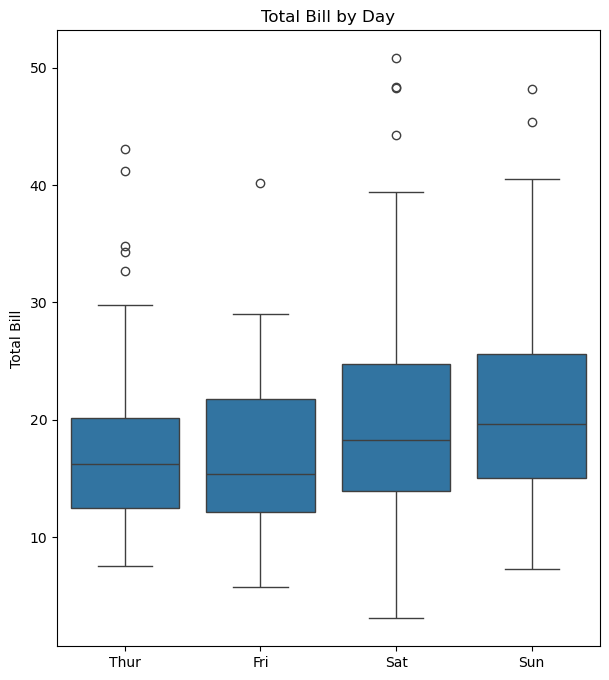

In [3]:
# boxplot
fig,ax = plt.subplots(figsize = (7,8))

sns.boxplot(data=tips, x='day', y='total_bill')

ax.set_title('Total Bill by Day')
ax.set_xlabel('')   # ẩn x label vì thấy không cần thiết
ax.set_ylabel('Total Bill')
plt.show()

### Tham số hue, palette - Đổ màu cho từng Box theo bảng màu mà biến palette xác định

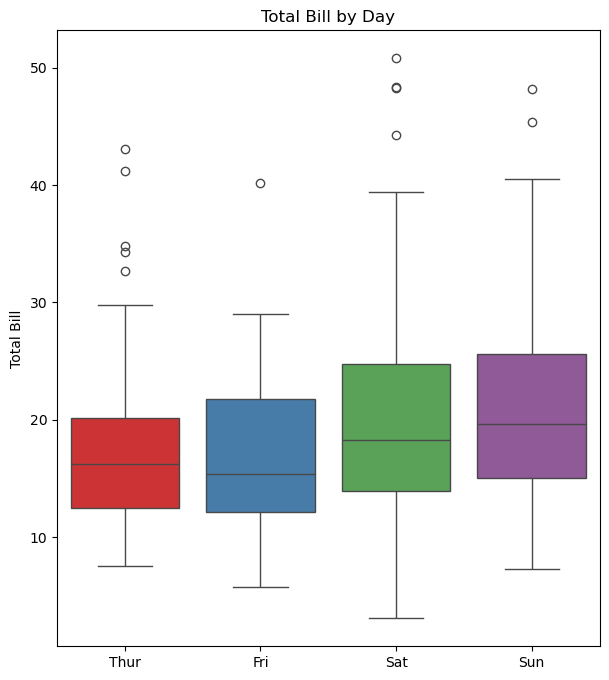

In [4]:
# đổ màu cho từng box. Có thể dùng tham số palette, tuy nhiêu palette hay được dùng với tham số hue và cách này trong tương lai sẽ bị xóa
# Sử dụng hue với tham số là 'day' sẽ giúp tô màu cho từng box, và thay đổi màu theo ý thích thì có thể dùng palette 
# palette: là bảng màu. xem tại: https://www.practicalpythonfordatascience.com/ap_seaborn_palette#set1-set1-r
# cũng có thể tự custom bảng màu cho mình.
# boxplot
fig,ax = plt.subplots(figsize = (7,8))
sns.boxplot(data=tips, x='day', y='total_bill', hue='day', palette='Set1')

ax.set_title('Total Bill by Day')
ax.set_xlabel('')   # ẩn x label vì thấy không cần thiết
ax.set_ylabel('Total Bill')
plt.show()

### Tham số hue - Chia nhỏ từng box thành các box nhỏ hơn ứng với các giá trị của biến hue - Grouped Boxplot

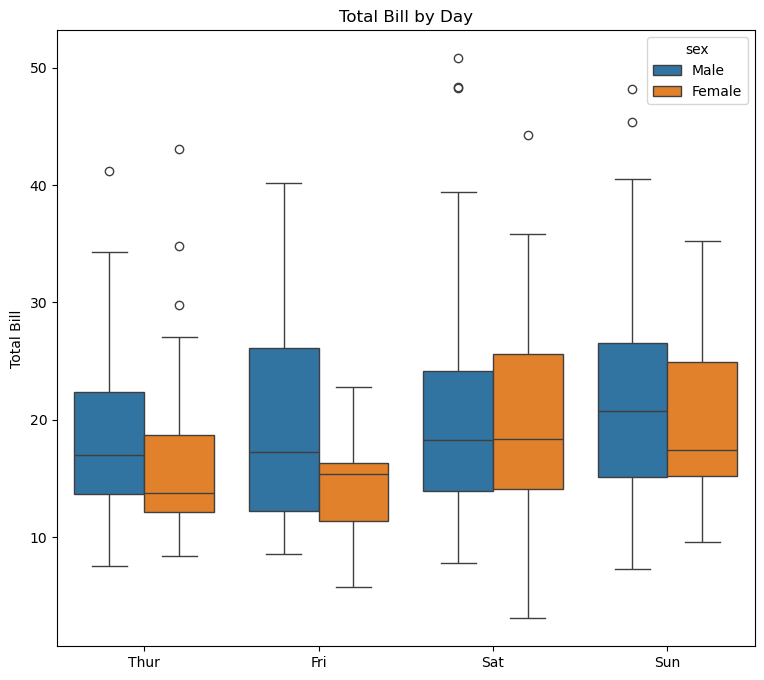

In [5]:
# Khi muốn biểu diễn thêm 1 chiều Categorical data nữa, ta có thể sử dụng tham số hue. Như ở ví dụ trên, ta có thể biểu diễn với 3 chiều là (day,sex, total_bill).
# khi dùng hue nó sẽ tự tạo Legend tương đương với các biến categorical trong chiều đó.
# Phân chia Box ban đầu thành 2 Box tương ứng Male và Female

fig,ax = plt.subplots(figsize = (9,8))
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')  # hue

ax.set_title('Total Bill by Day')
ax.set_xlabel('')
ax.set_ylabel('Total Bill')
plt.show()

### gap - Dùng để tăng khoảng cách giữa các Box khi dùng biến hue

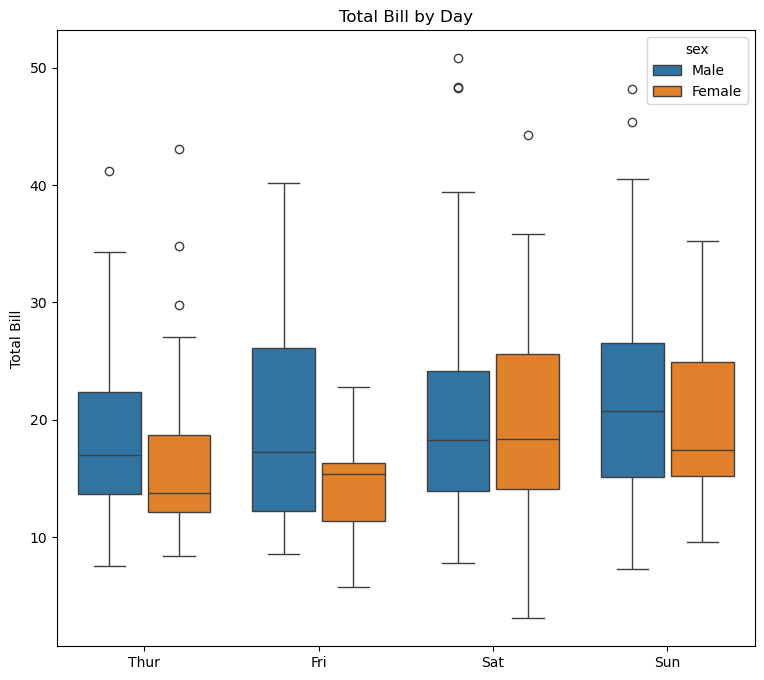

In [6]:
# thấy các Box của Male và Female dính sát nhau. Ta sẽ tách nó ra bằng tham số gap. Mặc định gap=0 là dính liền nhau

fig,ax = plt.subplots(figsize = (9,8))
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', gap=0.1)  # gap

ax.set_title('Total Bill by Day')
ax.set_xlabel('')
ax.set_ylabel('Total Bill')
plt.show()

### Dịch Legend ra ngoài Plot

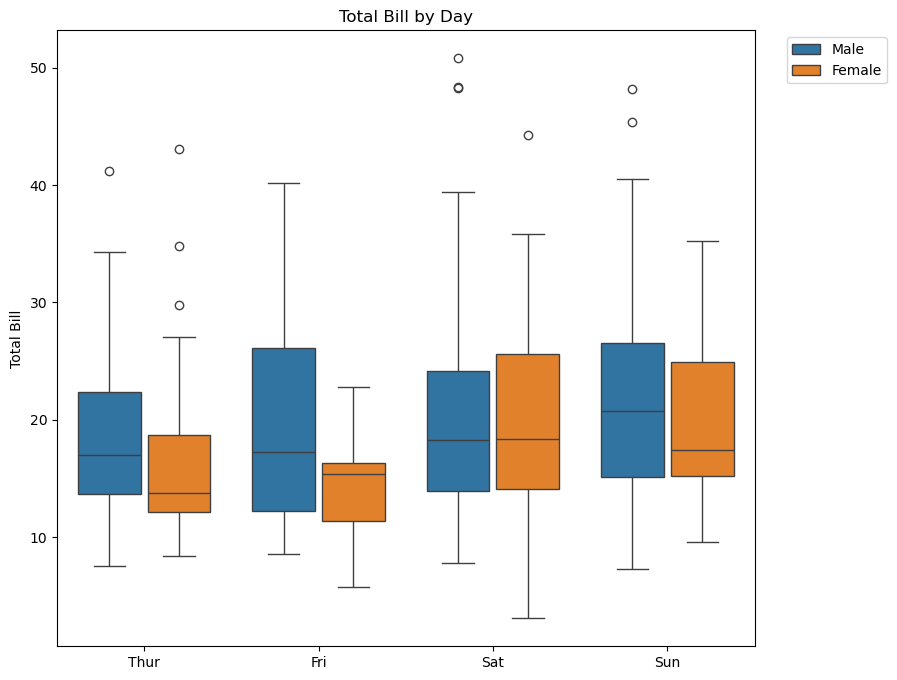

In [7]:
# Dịch Legend ra ngoài Plot
fig,ax = plt.subplots(figsize = (9,8))
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', gap=0.1)  

ax.set_title('Total Bill by Day')
ax.set_xlabel('')
ax.set_ylabel('Total Bill')
plt.legend(bbox_to_anchor = [1.2, 1])   # toa do [1,1] là vị trí ban đầu trước đó của Legend
plt.show()

### Điểu chỉnh background của Plot

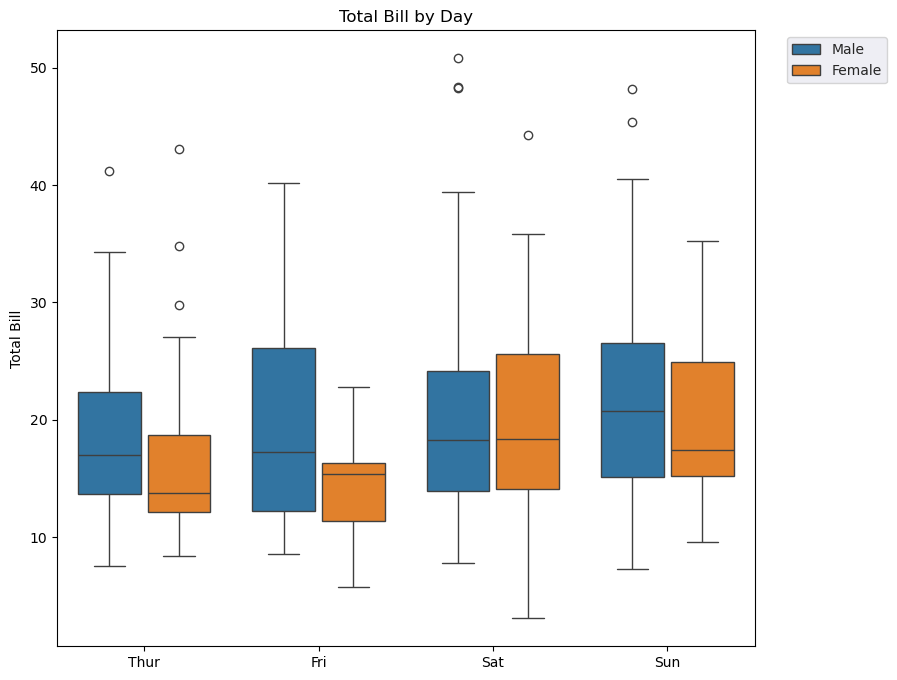

In [8]:
# điều chỉnh backgroud của Plot
fig,ax = plt.subplots(figsize = (9,8))
sns.set_style('dark')    # set_style để chỉnh background. có 5 loại background
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', gap=0.1)  

ax.set_title('Total Bill by Day')
ax.set_xlabel('')
ax.set_ylabel('Total Bill')
plt.legend(bbox_to_anchor = [1.2, 1])  
plt.show()

### Lọc các Outlier

In [9]:
# lọc ra các outlier. Tính Q1, Q3

Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)
IQR = Q3 - Q1

Minimum = Q1 - 1.5*IQR
Maximum = Q3 + 1.5*IQR

outliers = (tips['total_bill'] < Minimum) | (tips['total_bill'] > Maximum)
print('Danh sách các Outlier: ')
tips[outliers]


Danh sách các Outlier: 


,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


### flierprops - Chỉnh thuộc tính của Outliers 

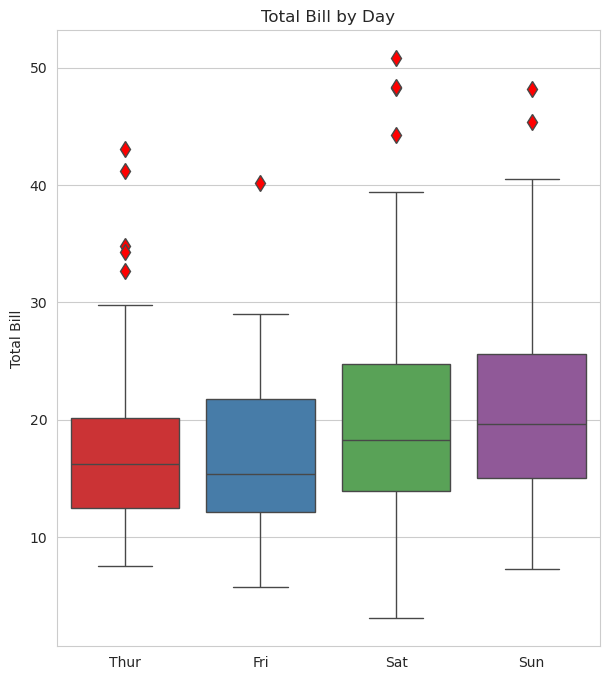

In [26]:
# chỉnh hình dạng, kích thước, màu sắc của outlier trên boxplot dùng tham số flierprops - viết tăt của từ outlier property
# flierprops = {marker, markersize, markerfacecolor, markeredgecolor, markersize, linestyle, linewidth}. 
# xem tại trang 186 - https://matplotlib.org/2.0.2/Matplotlib.pdf

fig,ax = plt.subplots(figsize = (7,8))
sns.boxplot(data=tips, x='day', y='total_bill', hue='day', palette='Set1' ,flierprops={'marker': 'd', 'markersize': 8, 'markerfacecolor': 'r'}, ax=ax)   # dùng tham số flierprops

ax.set_title('Total Bill by Day')
ax.set_xlabel('')  
ax.set_ylabel('Total Bill')
plt.show()

### fill - (True, False). Có đổ màu cho Box không

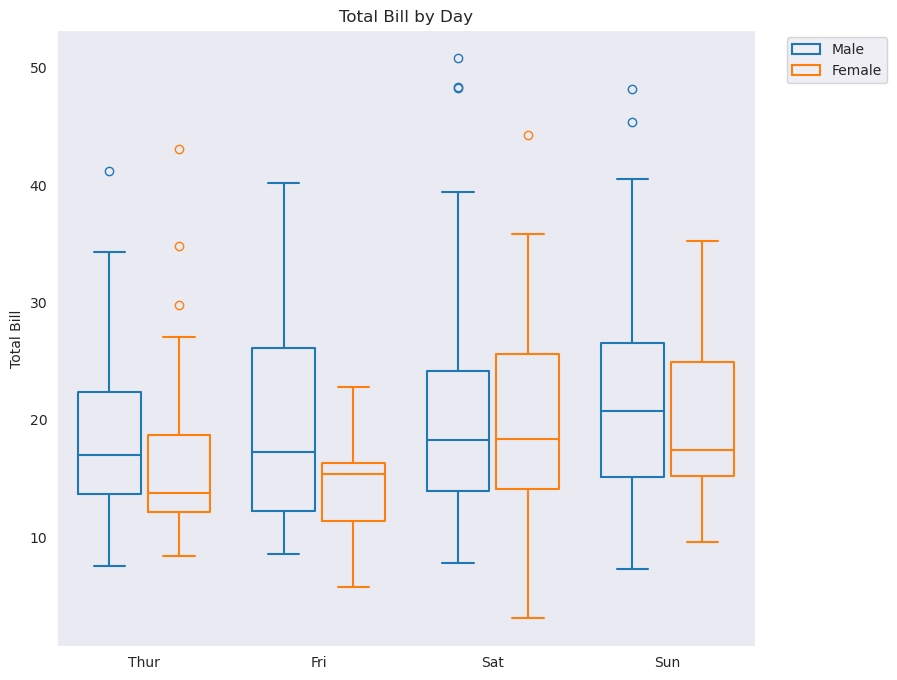

In [11]:
# không đổ màu cho boxplot thì dùng tham số fill=False

fig,ax = plt.subplots(figsize = (9,8))
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', fill=False, gap=0.1)   # fill=False

ax.set_title('Total Bill by Day')
ax.set_xlabel('')
ax.set_ylabel('Total Bill')
plt.legend(bbox_to_anchor = [1.2, 1])  
plt.show()

### order, hue_order - Sắp xếp Boxplot theo thứ tự mong muốn

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


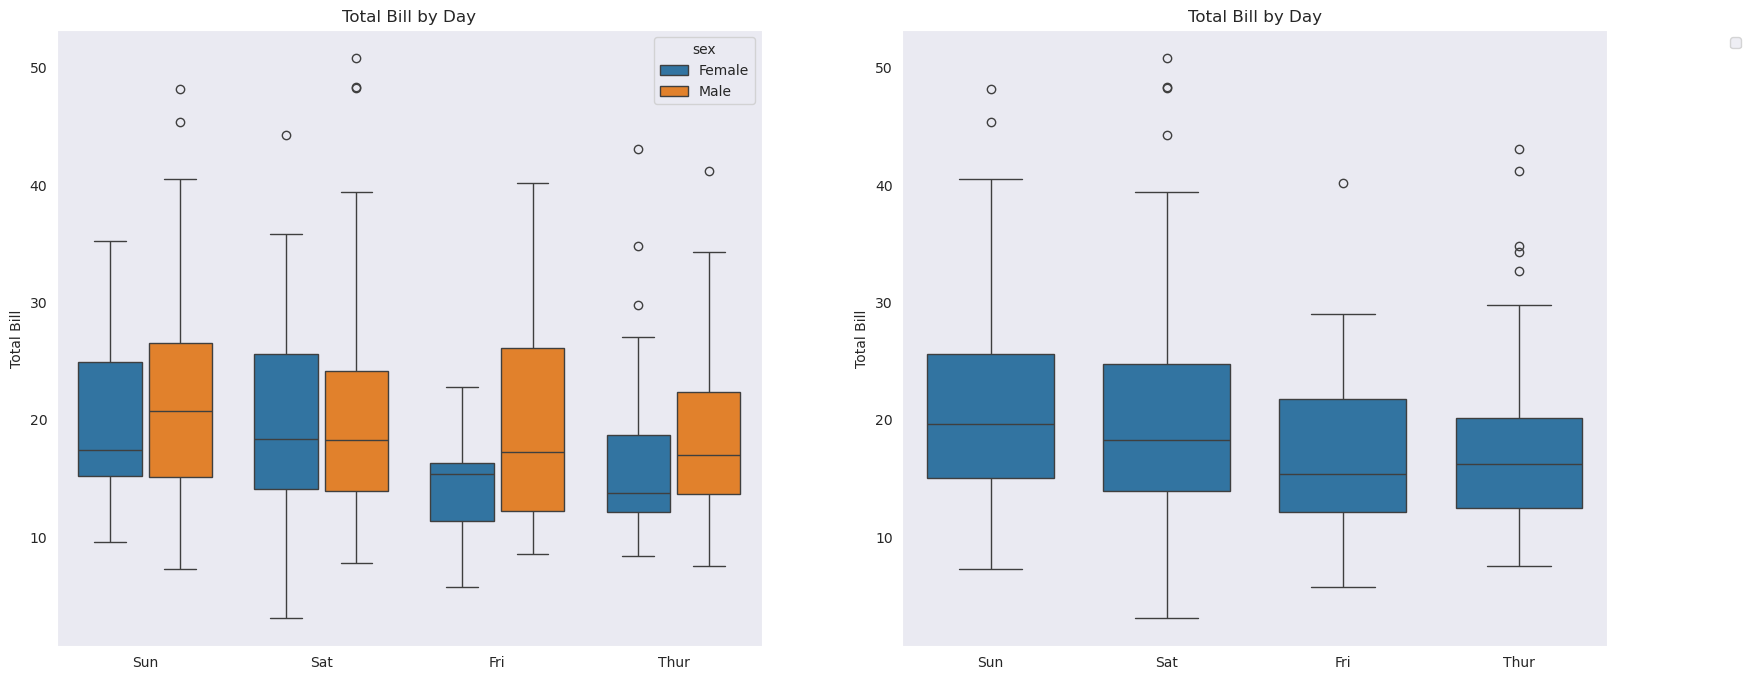

In [12]:
# sắp xếp các boxplot theo thứ tự mình mong muốn. 
# Tạo 1 list là danh sách theo thứ tự mình muốn hiển thị. 
# sử dụng tham số order sẽ hiển thị đúng thứ tự trong list.
# hue_order chi dung khi su dung tham so hue

# Ở ví dụ dưới, ta sẽ đảo ngược thứ trong tuần lại đáng nhẽ là thứ 5-6-7-cn, đảo ngược lại thành cn-7-6-5. Và đảo ngược thứ tự hiển thị đang là Male->Female thành Female->Male

fig,ax = plt.subplots(1,2, figsize = (20,8))  

order = ['Sun', 'Sat', 'Fri', 'Thur']
hue_order = ['Female', 'Male']

# fig1
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', gap=0.1, order=order, hue_order=hue_order, ax=ax[0])   # order, hue_order
ax[0].set_title('Total Bill by Day')
ax[0].set_xlabel('')
ax[0].set_ylabel('Total Bill')

# fig2
sns.boxplot(data=tips, x='day', y='total_bill', gap=0.1, order=order, ax=ax[1]) # order
ax[1].set_title('Total Bill by Day')
ax[1].set_xlabel('')
ax[1].set_ylabel('Total Bill')

plt.legend(bbox_to_anchor = [1.2, 1])  
plt.show()

### orient - Xoay ngang Boxplot

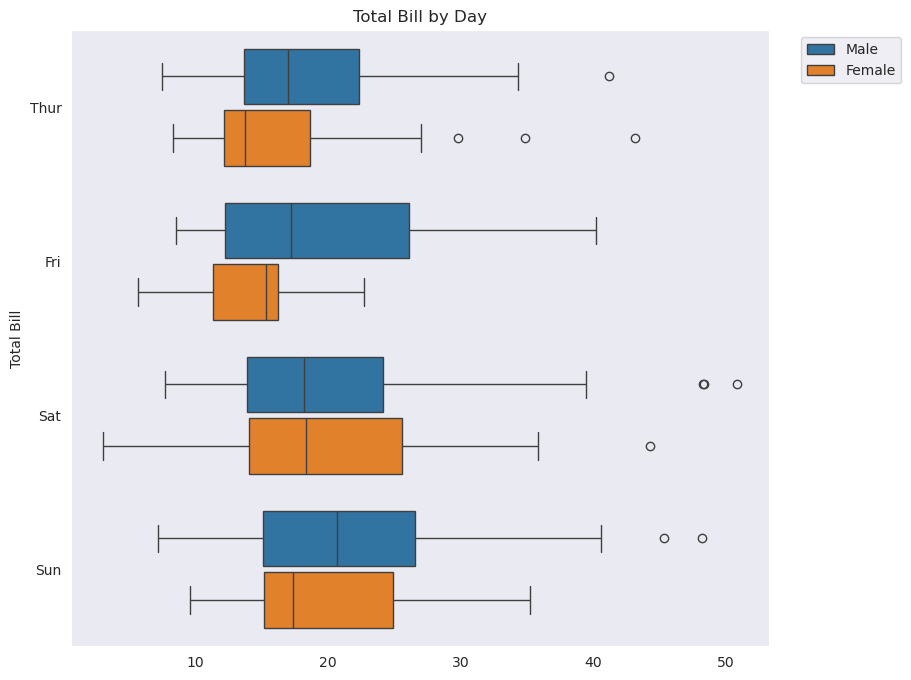

In [13]:
# xoay ngang boxplot sử dụng tham số orient. Có 2 giá trị 'v', 'h'
# orient xác định trục mà seaborn sẽ dùng để làm nhãn và vẽ boxplot
# Lưu ý: Khi từ dọc xoay ngang ta phải đổi cả tham số x,y cho nhau.

fig,ax = plt.subplots(figsize = (9,8))  

sns.boxplot(data=tips, x='total_bill', y='day', hue='sex', gap=0.1, orient='h') # trao đổi x,y cho nhau.

ax.set_title('Total Bill by Day')
ax.set_xlabel('')
ax.set_ylabel('Total Bill')
plt.legend(bbox_to_anchor = [1.2, 1])  
plt.show()

### saturation - Độ bão hòa của màu 

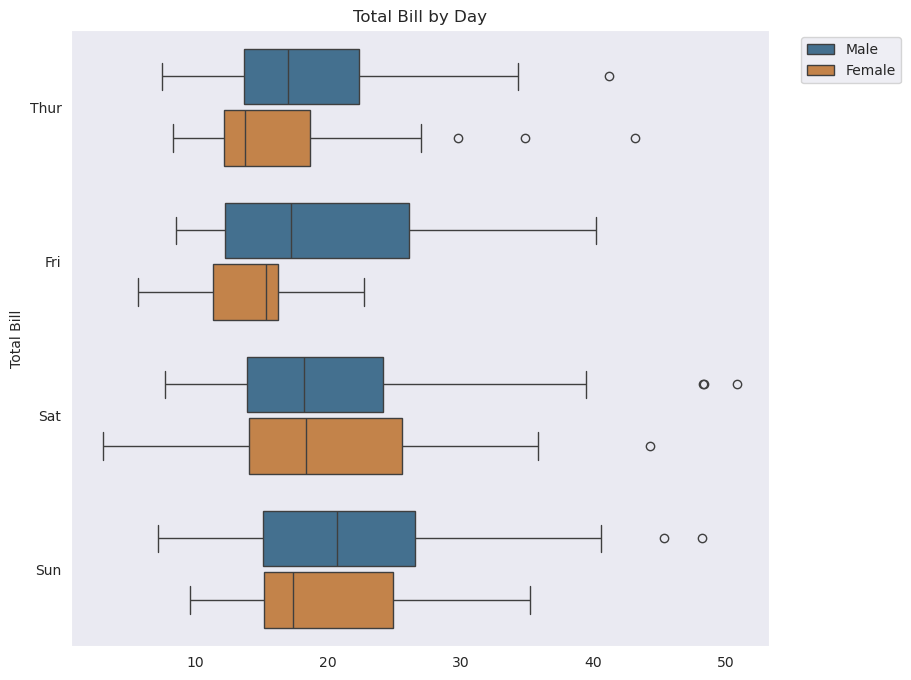

In [14]:
# chỉnh độ bão hòa của màu sắc trong toàn bộ plot
# mặc định độ bão hòa của màu sẽ là cao nhât 100%
# ngta cho rang voi cac bieu do lon, su dung saturation thap se de nhin hon
# saturation = 0->1 thể hiện mức độ bão hòa màu

fig,ax = plt.subplots(figsize = (9,8))  

sns.boxplot(data=tips, x='total_bill', y='day', hue='sex', gap=0.1, orient='h', saturation=0.5) 

ax.set_title('Total Bill by Day')
ax.set_xlabel('')
ax.set_ylabel('Total Bill')
plt.legend(bbox_to_anchor = [1.2, 1])  
plt.show()

### whis - chỉnh chiều dài của whiskers

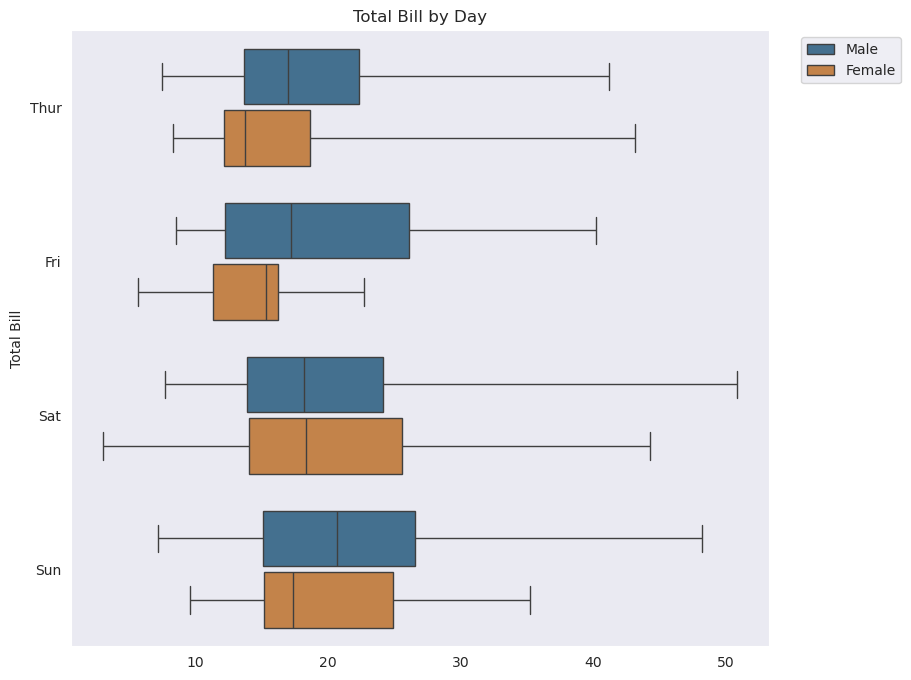

In [15]:
# whis là viết tắt của whiskers
# nhớ công thức tính độ dài của Whiskers: Qi - 1.5*IQR
# nếu whis = 1_số. thì công thức sẽ chở thành: Qi - whis * IQR
# nếu whis là 1 tupe (a,b). thì nó sẽ là % mà whiskers hiện. a là của whisker dưới, b là của whisker trên. 
# Râu dưới vẽ tới sample i mà giá trị của sample i phải [nhỏ nhất và lớn hơn hoặc bằng a% số lượng sample]. VD: a=5, số sample=100, thì lấy 5 outlier ở râu dưới, với giá trị outlier cao  nhất lớn hơn 5%  các sample
# Râu trên vẽ tới sample j mà giá trị của sample j phải [nhỏ nhất và lớn hơn hoặc bằng b% số lượng sample]. VD: b=95,số sample=100, thì lấy 5 outlier ở râu trên, với giá trị outlier thấp nhất lớn hơn 95% các sample 

fig,ax = plt.subplots(figsize = (9,8))  

sns.boxplot(data=tips, x='total_bill', y='day', hue='sex', gap=0.1, orient='h', saturation=0.5,  whis=(0, 100)) 

ax.set_title('Total Bill by Day')
ax.set_xlabel('')
ax.set_ylabel('Total Bill')
plt.legend(bbox_to_anchor = [1.2, 1])  
plt.show()

### log_scale - sử dụng log scale cho biểu dồ

In [16]:
titanic = sns.load_dataset('titanic')
titanic['age_round'] = titanic['age'].round(-1)  # làm tròn theo đơn vị chục gần nhất
titanic.loc[:, ['age', 'age_round', 'fare']]

,age,age_round,fare
0,22.0,20.0,7.2500
1,38.0,40.0,71.2833
2,26.0,30.0,7.9250
3,35.0,40.0,53.1000
4,35.0,40.0,8.0500
...,...,...,...
886,27.0,30.0,13.0000
887,19.0,20.0,30.0000
888,NaN,NaN,23.4500
889,26.0,30.0,30.0000


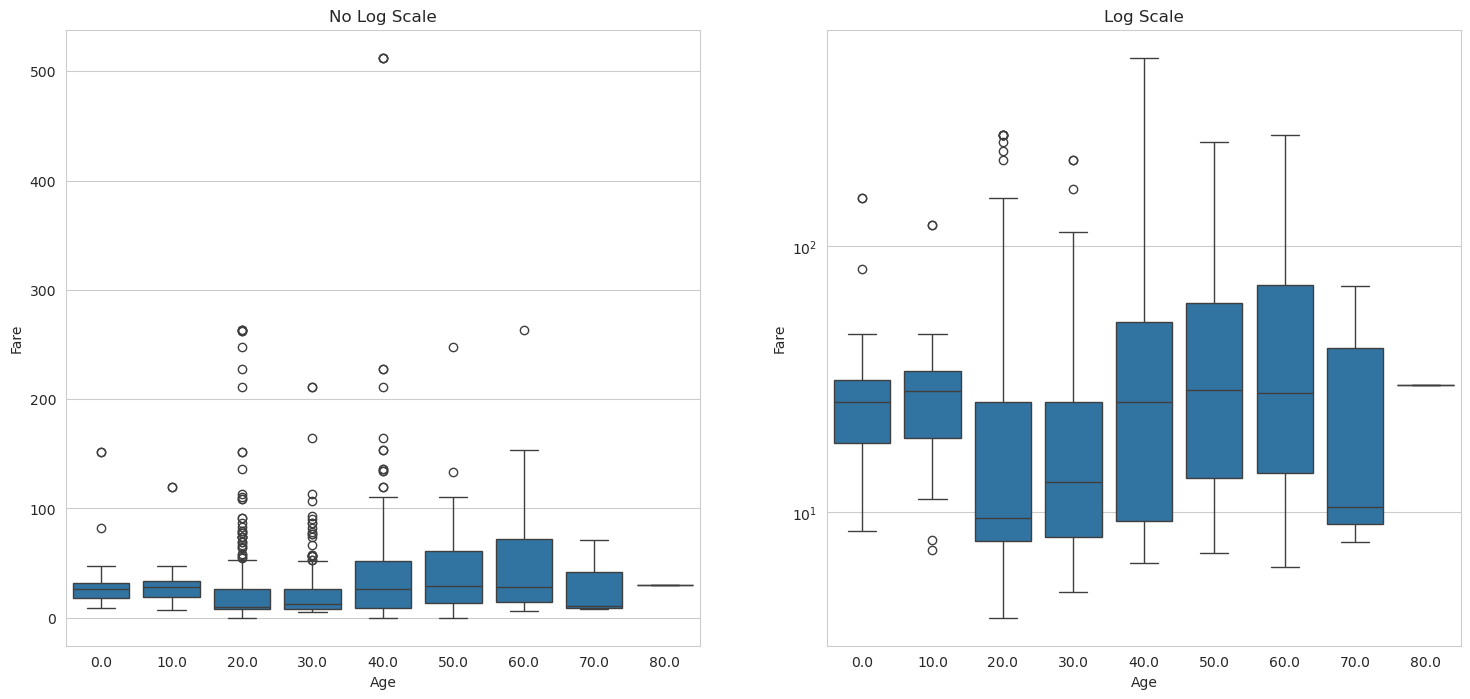

In [22]:
# thông tin về biểu đồ semi-log: https://vnrebates.info/bieu-do-logarit-la-gi.html . Tóm tắt lại: semi-log sẽ nhấn mạnh vào sự thay đổi theo phần trăm
# vẽ biểu đồ log: https://www.youtube.com/watch?v=-V-AbpxanLA&ab_channel=MSc.Nguy%E1%BB%85nT%E1%BB%95ng
# các trường hơp sử dung log scale: https://www.statology.org/when-to-use-log-scale/
# biểu đồ symlog sẽ vẽ giống với log scale nhưng (xung quanh giá trị 0 và gía trị 0) nó sẽ vẽ như bình thường: https://stackoverflow.com/questions/3305865/what-is-the-difference-between-log-and-symlog
# tùy vào khoảng số lượng giá trị và khoảng gía trị, Boxplot sẽ quyết dịnh vẽ từ điẻm có giá trị bằng bao nhiêu để dễ nhìn. Điều đó giá thích cho việc vì sao đoạn đơn vị đầu tiên
# có thể ngắn hơn các đoạn đơn vị còn lại.  Như ở VD dưới: Khoảng giá trị đầu tiên đên 10^1 ngắn hơn 10^1->10^2 do Boxplot bắt đầu vẽ từ các điểm có giá trị =3
# log_scale = a. vẽ log cho 1 trục (semi-log). log_scale=(a,b) vẽ log cho cả 2 trục (log-log)
# Chỉ vẽ ra các điểm có giá trị > 0


# giữ nguyên được thứ tự các điểm khi sử dụng log scale. 
# vì a > b thì log(a) > log(b). vậy lên thứ tự, điểm nào lớn hơn vẫn sẽ lớn hơn, điểm nào bé hơn vẫn sẽ bé hơn. 
# Đương nhiên số lượng các Outlier hiển thị sẽ khác đi do các giá trị Q1,Q2,Q3 đã bị thay đổi do dùng hàm log

# Trường hợp sử dụng: 
# 1: Bộ dữ liệu có 1 số điểm có giá trị rất lớn so với các điểm còn lại. Dẫn tới Boxplot phị thu nhỏ loại để khớp với kích thước fig khiến khó nhìn. Ta có thể sử dụng log_scale để phóng to Boxplot.
# 2: khi ta quan tâm đến sự thay đổi về phần trăm giá trị hơn là thay đổi theo đơn vị gốc. VD: giá vàng ngày hôm nay là 50 đồng, ngày mai là 100 đồng, ngày kia là 150 đồng. 
#    Nêu không dùng log_scale thì đoạn 50->100 sẽ dài bằng đoạn 100->150 vì cùng tăng 50đ. Nhưng nếu log_scale, thì đoạn 50->100 (tăng 100%) sẽ dài gấp đôi đoạn 100->150(tăng 50%)



titanic = sns.load_dataset('titanic')
titanic['age_round'] = titanic['age'].round(-1)  # làm tròn theo đơn vị chục gần nhất

fig,ax = plt.subplots(1,2, figsize= (18,8))
sns.set_style('whitegrid')

# No Log Scale
sns.boxplot(data=titanic, x='age_round', y='fare', ax=ax[0])
ax[0].set_title('No Log Scale')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Fare')

# Log Scale
sns.boxplot(data=titanic, x='age_round', y='fare', ax=ax[1], log_scale=10)  # tinh log10(y)
ax[1].set_title('Log Scale')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Fare')

plt.show()

### native_scale - Dữ nguyên khoảng các thực giữa các Box

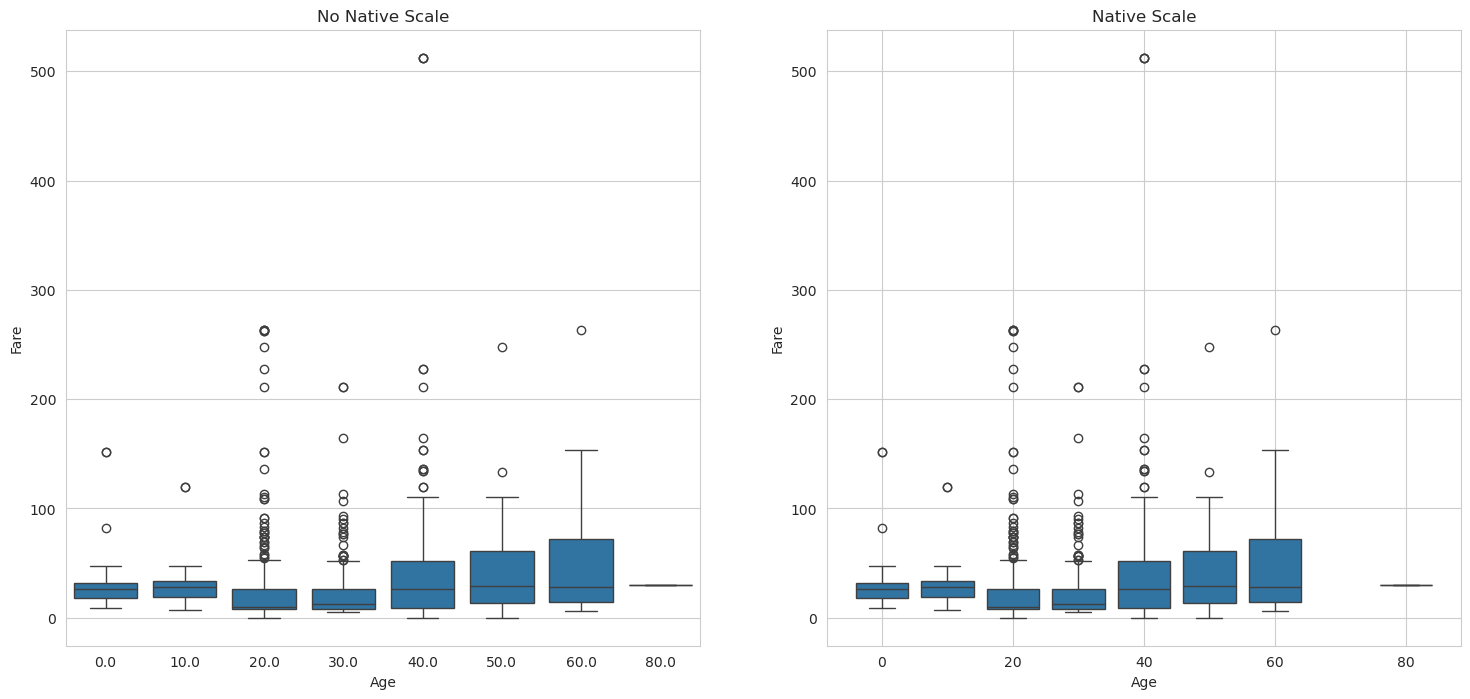

In [18]:
# Mặc định giá trị trên trục Categorical Axis sẽ được tham chiếu tới các giá trị rời rạc [0,1,2,3...] thể hiện vị trí của chú trên trục, ngay cả khi trục này là giá trị số. VD. Trục x có 3 giá trị [20, 30, 50]
# mặc định nó sẽ tham chiếu 3 giá trị kia tới các giá trị [0,1,2], nhưng vậy khoảng cách giữa chúng là giống nhau.
# Nếu muốn giữ khoảng cách của điểm 30->50 phải gấp 2 khoảng cách  20->30. thì dùng native_scale=True

# VD ở dưới Xóa tuổi bằng 70 đi: 
# nếu native_scale = False (default) thì vị trí 60->80 giống với các vị trí còn lại. 
# nếu native_scale = True thì nó trở về dúng khoảng cách 

# Thường dùng khi trục Categorical Axis là giá trị số



fig,ax = plt.subplots(1,2, figsize= (18,8))
sns.set_style('whitegrid')

# No Native Scale
mask = titanic['age_round'] != 70   # xóa các giá trị bằng 70 
sns.boxplot(data=titanic[mask], x='age_round', y='fare', ax=ax[0])
ax[0].set_title('No Native Scale')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Fare')


# Native Scale
mask = titanic['age_round'] != 70
sns.boxplot(data=titanic[mask], x='age_round', y='fare', ax=ax[1], native_scale=True)  # native_scale giữ nguyên giá trị khoảng cách 
ax[1].set_title('Native Scale')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Fare')


plt.show()


### width, linewidth, linecolor, fliersize  

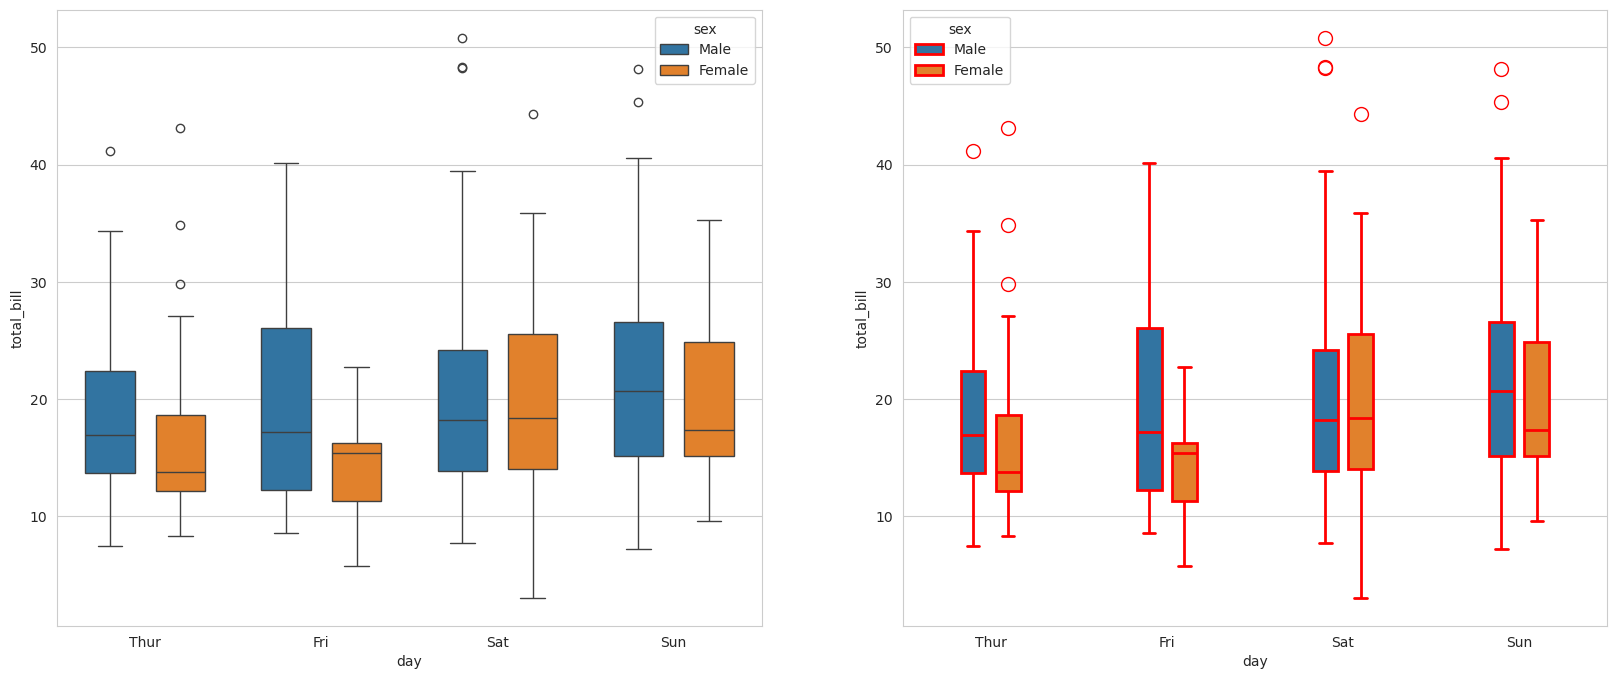

In [19]:
# width: độ rộng của Patch
# linewidth: độ rộng của Frame
# linecolor: chỉ dùng khi fill=True, màu của Frame
# fliersize: kích thước flier
# Những cái trên có thể trỉnh chi tiết hơn trong tham số  flierprops, boxprops, whiskerprops, capprops, medianprops, meanprops

fig,ax = plt.subplots(1,2, figsize = (20,8))
sns.set_style('whitegrid')    
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', gap=0.3, ax=ax[0])  
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', gap=0.3, ax=ax[1], width=0.4, linewidth=2, linecolor='red', fliersize=10)  
plt.show()


### notch, bootstrap - vẽ Notch

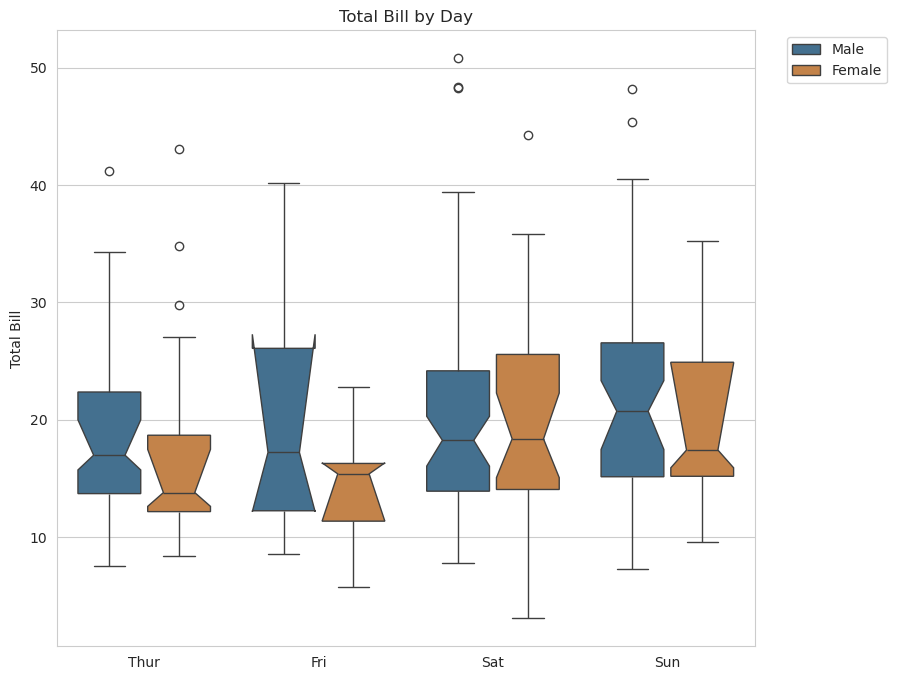

In [20]:
# các tham số kế thừa từ Matplotlib. Sẽ có 1 số tham số của thằng cha này bị trùng chức năng với thằng seaborn.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot

# notch: Vẽ Confident interval hay ko (True or False)
# bootstrap: Số lần lấy ngẫu nhiên các phần tử từ tập kết quả ban đầu (Bước 1: https://www.notion.so/Data-Science-36018364209f40fda725361d8e4c9b0a?p=6d553ab9a16e45e59e1f76a200c51845&pm=s) để tính 95% confident interval theo Bootstrap. thường cho trong khoảng [1000, 10000]
#            Nếu bootstrap=None thì nó sẽ tính notch dụa vào công thức Gaussian-based asymptotic approximation: https://stat.ethz.ch/pipermail/r-help/2004-March/046856.html. Nó tính dựa vào IQR, số lg mẫu, hằng số C
# conf_intervals: mảng tọa độ của notch, thường cái này sẽ không dùng vì ta phải biết trước các toạ độ của notch. trong khi cái ta muốn lại là tìm notch

# Ví dụ bên dưới là cái notch nó dài vượt quá cả Q1 và Q3 ở 1 số box lên thành ra hình vậy. ko vấn đề gì

fig,ax = plt.subplots(figsize = (9,8))  

sns.boxplot(data=tips, x='day', y='total_bill' , hue='sex', gap=0.1, saturation=0.5, notch=True, bootstrap=3000)  # vẽ notch và sử dụng bootstraping với số lần lăp là 3000

ax.set_title('Total Bill by Day')
ax.set_xlabel('')
ax.set_ylabel('Total Bill')
plt.legend(bbox_to_anchor = [1.2, 1])  
plt.show()


### showcaps, showbox, showfliers, showmeans (True, False)- Quyết đinh thành phần nào được hiển thị

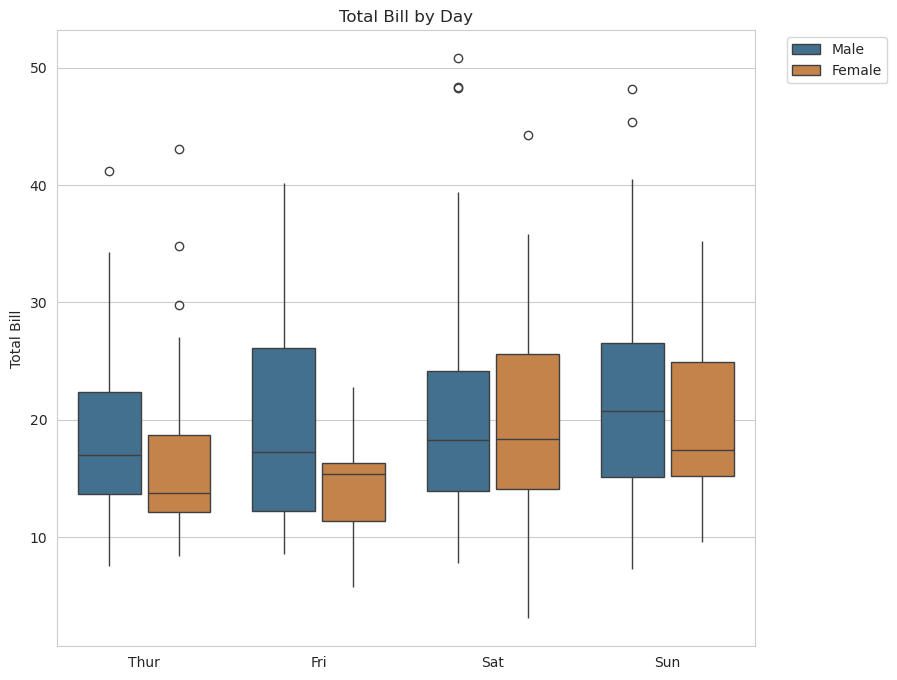

In [21]:
fig,ax = plt.subplots(figsize = (9,8))  

sns.boxplot(data=tips, x='day', y='total_bill' , hue='sex', gap=0.1, saturation=0.5, showcaps=False)  # Không vẽ Caps
ax.set_title('Total Bill by Day')
ax.set_xlabel('')
ax.set_ylabel('Total Bill')
plt.legend(bbox_to_anchor = [1.2, 1])  
plt.show()
